# Heart Disease Predictor

- This *new_data* branch is for improving this model.
- I need to know more about this dataset and make my Data Science practices more clear, easy to understand, and more robust.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Life cycle of a Data Science project:
- Data Collection
- EDA
- Data Preprocessing
- Feature Engineering
- Model building and evaluation
- Model deployment

## Data Collection

In [2]:
data = pd.read_csv('./data/framingham.csv')

In [3]:
data.shape

(4238, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## EDA

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- Check for duplicated data.

In [40]:
data_duplicates = data.duplicated()
data_duplicates.sum()

0

- there are **NO** duplicates in the dataset.
- Below is a python function to list unique values

In [47]:
def unique_vals(col):
    return list(col.unique())

- Python function to count unique vals in a feature

In [48]:
def count_unique_vals(col):
    unique_vals = {}
    for i in col:
        if np.isnan(i):
            continue
        if i not in unique_vals:
            unique_vals[i] = 1
        else:
            unique_vals[i] += 1
    return unique_vals

- Check if we have imbalanced dataset

In [49]:
count_unique_vals(data['TenYearCHD'])

{0: 3594, 1: 644}

<AxesSubplot:xlabel='TenYearCHD', ylabel='Count'>

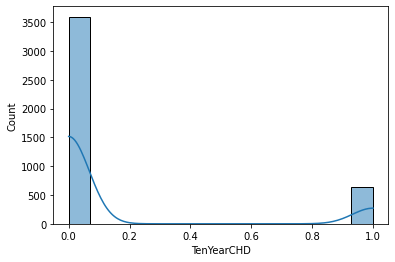

In [50]:
sns.histplot(x=data['TenYearCHD'], kde=True)

- So, the above dataset is imbalanced. If we train the binary classification without fixing this issue, our model will be completely biased.
- this would also impact our feature correlation.
- So, let's handel this first.

##### Handling imbalanced dataset

---

## Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('TenYearCHD', axis=1), data['TenYearCHD'], test_size=0.3, random_state=0)

- explore train and test data:

In [7]:
print('X_train.shape=', X_train.shape, '\nX_test.shape=', X_test.shape)

X_train.shape= (2966, 15) 
X_test.shape= (1272, 15)


Overview of the following procedure:
1. perform **imputation** on both train & test data seperately.
2. perform **EDA**, **preprocessing**, and **feature engineering** on the train data.
3. perform **preprocessing** on the test data as well, so that it can be a valid information for the model.
4. build model using train data.
5. test it's accuracy using test data: this will be the final accuracy of the model.

In [8]:
X_train.isnull().sum()

male                 0
age                  0
education           72
currentSmoker        0
cigsPerDay          26
BPMeds              39
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            267
dtype: int64

In [9]:
X_test.isnull().sum()

male                 0
age                  0
education           33
currentSmoker        0
cigsPerDay           3
BPMeds              14
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                  3
heartRate            0
glucose            121
dtype: int64

- visualize the *null values*

<AxesSubplot:>

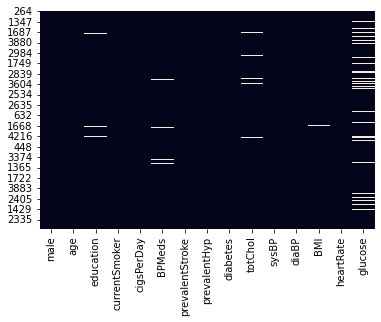

In [10]:
sns.heatmap(X_train.isnull(), cbar=False)

<AxesSubplot:>

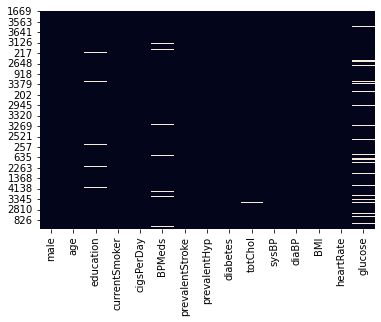

In [11]:
sns.heatmap(X_test.isnull(), cbar=False)

- There are some features having null values so, we need to perform imputation in the train dataset.
- why inputation? why not delete the feature itself?
    - because none of the feature contains more than half null values, infact the maximum null values contained is in *glucose* feature which is 267/2966 = 0.09 or *9%* approx on train data and 121/1272 = 0.095 or *9.5%* approx on test data.

- all unique values of education

In [14]:
unique_vals(X_train.education)

[1.0, 2.0, 3.0, 4.0, nan]

- what impact would **education** have on Ten-year-coronary-heart-disease?
- **NO** impact right?
- So, it's just right to drop this feature itself.
- let's drop it.

In [15]:
X_train.drop('education', axis=1, inplace=True)
X_test.drop('education', axis=1, inplace=True)
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
264,1,57,0,0.0,0.0,0,1,0,176.0,134.0,97.0,38.14,68.0,94.0
385,1,39,0,0.0,0.0,0,0,0,235.0,120.0,80.0,27.23,62.0,87.0
2564,1,54,0,0.0,0.0,0,1,0,207.0,146.0,98.0,23.63,65.0,91.0
3787,0,49,0,0.0,0.0,0,0,0,203.0,125.0,70.0,22.52,72.0,NaN
4139,0,53,0,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0


- in order to perform successfull imputation, without much affecting the dataset, we'll have to categorize those features having null values as **categorical/nominal** or **continuous**.
- referring from the description given for the dataset it's visible that:
    - cigsPerDay, totChol, BMI, heartRate, glucose are **continuous** features.
    - BPMeds is a **nominal** feature.
- Handlling missing values:
    1. for nominal feature: replace with the most frequent value.
    2. for continuous features: perform mean/median imputation.

Distribution of **BPMeds** in the train dataset:

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

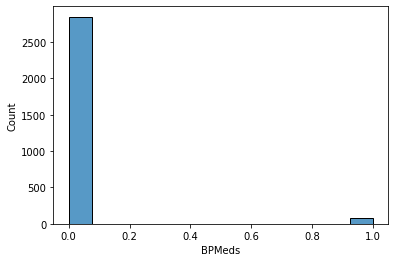

In [16]:
sns.histplot(X_train.BPMeds)

- count unique vals before imputation

In [17]:
print('X_train: ', count_unique_vals(X_train.BPMeds), '\nX_test: ', count_unique_vals(X_test.BPMeds))

X_train:  {0.0: 2847, 1.0: 80} 
X_test:  {0.0: 1214, 1.0: 44}


- most frequent value is **0**
- let's impute it's mode.

In [18]:
X_train['BPMeds'].fillna(X_train.iloc[4].mode().item(), inplace=True)
X_test['BPMeds'].fillna(X_test.iloc[4].mode().item(), inplace=True)
print('X_train:', X_train['BPMeds'].isnull().sum(), '\nX_test:', X_test['BPMeds'].isnull().sum())

X_train: 0 
X_test: 0


In [19]:
print('X_train: ', count_unique_vals(X_train.BPMeds), '\nX_test: ', count_unique_vals(X_test.BPMeds))

X_train:  {0.0: 2886, 1.0: 80} 
X_test:  {0.0: 1228, 1.0: 44}


- So, the missing values of BPMeds are handlled.
- *Nominal value imputation is complete!*
- Now imputing continuous values!

In [20]:
X_train.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          26
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            267
dtype: int64

In [21]:
X_test.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           3
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                  3
heartRate            0
glucose            121
dtype: int64

- filling missing values in **continuous** variables.

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

# imputation removed column names: putting them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

<AxesSubplot:>

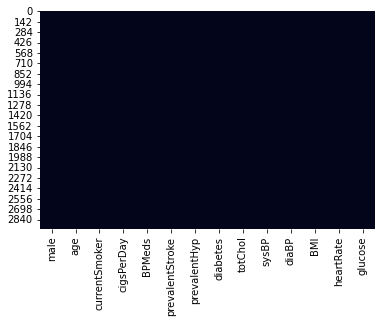

In [23]:
sns.heatmap(imputed_X_train.isnull(), cbar=False)

<AxesSubplot:>

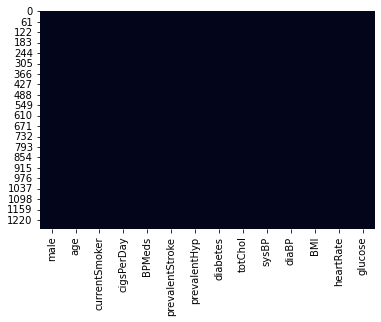

In [24]:
sns.heatmap(imputed_X_test.isnull(), cbar=False)

- Now assign imputed_X_train and imputed_X_test to X_train and X_test respectively.

In [25]:
X_train = imputed_X_train
X_test = imputed_X_test

print('X_train.isnull().sum().sum(): ', X_train.isnull().sum().sum(),
'\nX_test.isnull().sum().sum(): ',X_test.isnull().sum().sum())

X_train.isnull().sum().sum():  0 
X_test.isnull().sum().sum():  0


- Now missing/null values are completely handlled in both X_train and X_test.
- From now on I'll only focus on X_train data for any analysis, and buil the model on it.

---

#### Analysing the relationships between different features

- Distribution of *age* in the entore dataset.

<AxesSubplot:xlabel='age', ylabel='Count'>

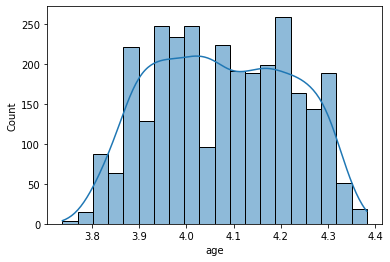

In [38]:
sns.histplot(x=np.log(X_train['age']+10), kde=True)

<AxesSubplot:xlabel='male', ylabel='Count'>

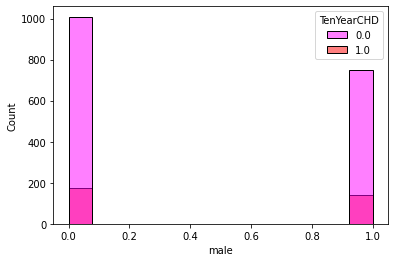

In [26]:
sns.histplot(x=X_train['male'], hue=y_train, palette=['Magenta','r'])

- more ratio of males have TenYearCHD than females

- Can there be a relation between the fraction of people having 10yearCHD at an age and the age?
- yes, let's see if this relation increases with age or something else.

In [27]:
# count of heart disease based on age
ages = unique_vals(X_train.age)
y = []
for age in ages:
    count = 0
    count_total = 0
    for i in range(0, len(X_train)):
        if X_train.age[i] == age:
            count_total += 1
            count += list(y_train)[i]
    y.append(count/count_total)

[Text(0.5, 0, 'age'), Text(0, 0.5, 'fraction of CHD patients at an age')]

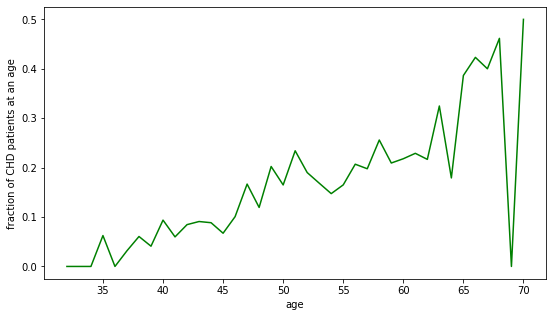

In [28]:
age_plot = plt.figure(figsize=(9,5))
age_plot = sns.lineplot(x=ages, y=y, color='g')
age_plot.set(xlabel='age', ylabel='fraction of CHD patients at an age')

From the above plot it's clear that with age more fraction of people suffer
from the 10yearCHD.
Also, we can say that the more is your age, there is a higher chance of you having 10yearCHD. And, we can also see a sudden downfall in the graph at an age of 68 approx, but since that is only for one age, it can be ignored.

<AxesSubplot:xlabel='currentSmoker', ylabel='Count'>

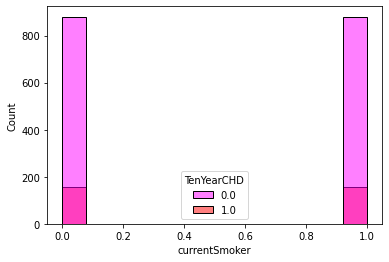

In [29]:
sns.histplot(x=X_train['currentSmoker'], hue=y_train, palette=['Magenta','r'])

- So, whether or not the person smokes or not they have almost equal chance of having the TenYearCHD.
- So, maybe this feature does not effect our overall prediction of the heart disease.

<AxesSubplot:xlabel='cigsPerDay', ylabel='age'>

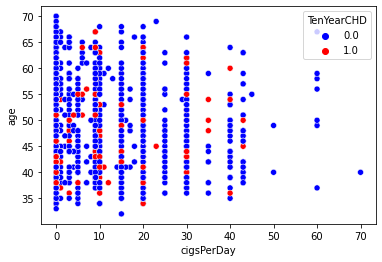

In [66]:
sns.scatterplot(x=X_train['cigsPerDay'], y=X_train['age'], hue=y_train, palette=['b','r'])

#### From the above plot
- for even less no. of cigsPerDay there are a lot of people suffering from the TenYearCHD.
- moving rightwards in the graph people suffering from the heart disease descreases irrespective of their age!
- which means that cigsPerDay does not have any role in predicting if the person suffers from TenYearCHD.